<a href="https://colab.research.google.com/github/GHILENISABEUR/ML_DATA_PROJECT/blob/main/ML_FIRST_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# load data

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/dataprofessor/data/master/delaney_solubility_with_descriptors.csv')


data separation y and x


In [ ]:
y = df['logS']
x=df.drop('logS',axis=1)
x

data split


In [ ]:
from sklearn.model_selection import train_test_split
x_train , x_test,y_train,y_test =train_test_split(x,y,test_size=0.2,random_state=100)


###model building


##linear regression


In [ ]:
from sklearn.linear_model import LinearRegression
lr =LinearRegression()
lr.fit(x_train,y_train)
LinearRegression()
y_lr_train_pred = lr.predict(x_train)
y_lr_test_pred = lr.predict(x_test)
print(y_lr_train_pred,y_lr_test_pred)


**evaluate model performance **

In [ ]:
from sklearn.metrics import mean_squared_error ,r2_score
lr_train_m =mean_squared_error(y_train,y_lr_train_pred)
lr_train_r2 = r2_score(y_train,y_lr_train_pred)
lr_test_m =mean_squared_error(y_test,y_lr_test_pred)
lr_test_r1 =r2_score(y_test,y_lr_test_pred)



In [ ]:
lr_result = pd.DataFrame(['linear regression  ',lr_test_r1,lr_train_r2,lr_test_m,lr_test_r1]).transpose()
lr_result.columns =['method','training','training r2','mse','test']

,method,training,training r2,mse,test
0,linear regression,0.789162,0.764505,1.020695,0.789162


random forest


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=2,random_state=100)
rf.fit(x_train,y_train)
y_rf_train_pred = rf.predict(x_train)
y_rf_test_pred = rf.predict(x_test)


In [ ]:
from sklearn.metrics import mean_squared_error ,r2_score
rf_train_m =mean_squared_error(y_train,y_rf_train_pred)
rf_train_r2 = r2_score(y_train,y_rf_train_pred)
rf_test_m =mean_squared_error(y_test,y_rf_test_pred)
rf_test_r1 =r2_score(y_test,y_rf_test_pred)


In [ ]:
rf_result = pd.DataFrame(['random forest  ',rf_test_r1,rf_train_r2,rf_test_m,rf_test_r1]).transpose()
rf_result.columns =['method','training','training r2','mse','test']
rf_result

In [ ]:
df_models=pd.concat([lr_result,rf_result ])
df_models

data visualzation


Text(0.5, 0, 'exprimental logS ')

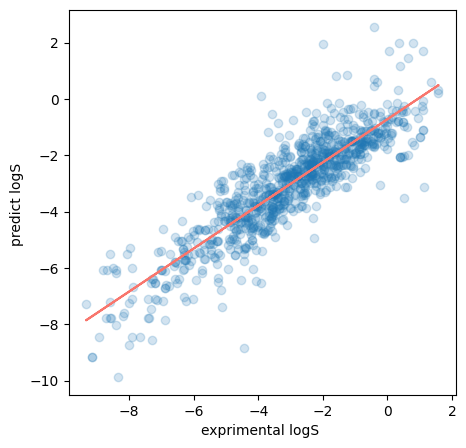

In [ ]:
import matplotlib.pyplot as pit
import numpy as np
pit.figure(figsize=(5,5))

pit.scatter(x=y_train,y=y_lr_train_pred,alpha=0.2)
z=np.polyfit(y_train,y_lr_train_pred,1)
p=np.poly1d(z)
pit.plot(y_train,p(y_train),'#F8766D')


pit.plot()
pit.ylabel('predict logS ')
pit.xlabel('exprimental logS ')



